In [1]:
pip install pandas seaborn matplotlib numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

credibilidade    97.916667
completude       99.999437
consistencia     99.305556
precisao         91.666667
dtype: float64


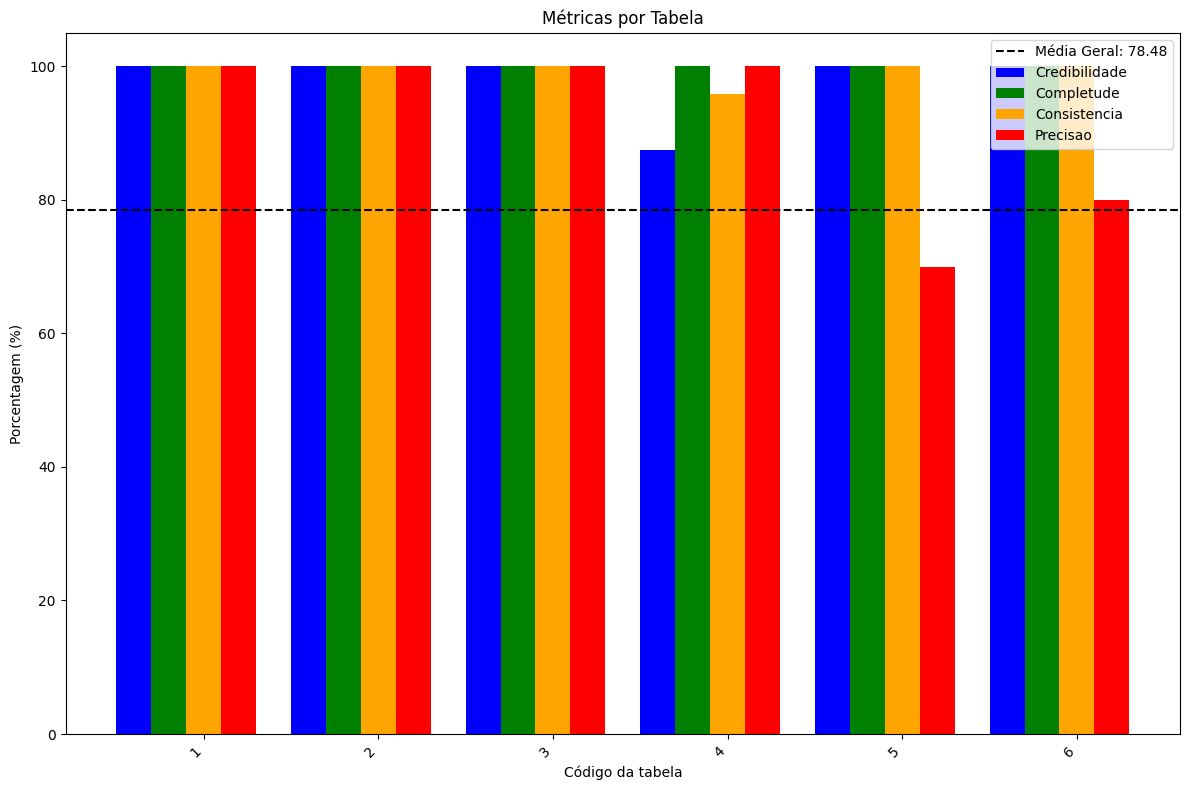

In [12]:
from collections import Counter
# Carregar os dados do CSV usando o pandas
dados_ufrpe = pd.read_csv('metricas_ufrpe.csv')

# Converter os dados de float para porcentagem
dados_ufrpe['credibilidade'] *= 100
dados_ufrpe['completude'] *= 100
dados_ufrpe['consistencia'] *= 100
dados_ufrpe['precisao'] *= 100

# Definir cores distintas para cada métrica
cores = {'credibilidade': 'blue', 'completude': 'green', 'consistencia': 'orange', 'precisao': 'red'}

# Configurar as posições das barras para cada base/metadado
posicoes = np.arange(len(dados_ufrpe['nome_da_tabela']))

# Largura das barras
largura_barra = 0.2

# Criar um gráfico de barras agrupadas
plt.figure(figsize=(12, 8))

for i, metrica in enumerate(dados_ufrpe.columns[2:]):
    plt.bar(posicoes + i * largura_barra, dados_ufrpe[metrica], width=largura_barra, color=cores[metrica], label=metrica.capitalize())

# Adicionar uma linha horizontal para a média geral
media_geral = dados_ufrpe.iloc[:, 1:].mean().mean()
media_por_coluna = dados_ufrpe.drop(columns=['id_tabela'])
media_por_coluna = media_por_coluna.mean(numeric_only=True)
print(media_por_coluna)
plt.axhline(y=media_geral, color='black', linestyle='--', label=f'Média Geral: {round(media_geral, 2)}')


# Ajustar rótulos e título
plt.xlabel('Código da tabela')
plt.ylabel('Porcentagem (%)')
plt.title('Métricas por Tabela')
plt.xticks(posicoes + largura_barra * (len(dados_ufrpe.columns[1:]) - 1) / 2, dados_ufrpe['id_tabela'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()


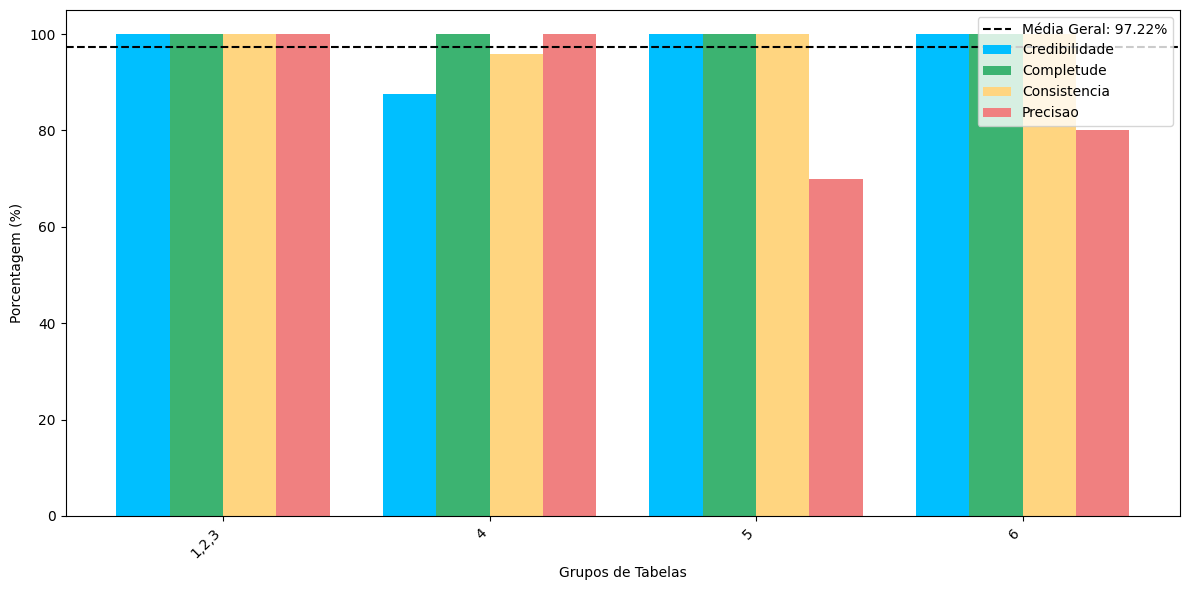

In [29]:
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregar os dados do CSV usando o pandas
dados_ufrpe = pd.read_csv('metricas_ufrpe.csv')

# Converter os dados de float para porcentagem
dados_ufrpe['credibilidade'] *= 100
dados_ufrpe['completude'] *= 100
dados_ufrpe['consistencia'] *= 100
dados_ufrpe['precisao'] *= 100

# Identificar grupos com métricas idênticas
agrupamentos = dados_ufrpe.groupby(['credibilidade', 'completude', 'consistencia', 'precisao']).agg({
    'id_tabela': lambda x: ','.join(x.astype(str)),
    'nome_da_tabela': lambda x: ','.join(x)
}).reset_index()

# Ordenar os agrupamentos pela ordem numérica dos IDs das tabelas
agrupamentos['id_tabela_num'] = agrupamentos['id_tabela'].apply(lambda x: int(x.split(',')[0]))
agrupamentos = agrupamentos.sort_values(by='id_tabela_num').drop(columns=['id_tabela_num'])

# Definir cores suaves para cada métrica
cores = {
    'credibilidade': '#00BFFF',  # DeepSkyBlue
    'completude': '#3CB371',     # MediumSeaGreen
    'consistencia': '#FFD580', # Amarelo
    'precisao': '#F08080' # Light Coral
}

# Configurar as posições das barras para cada grupo/metadado
posicoes = np.arange(len(agrupamentos['id_tabela']))
largura_barra = 0.2

# Criar gráfico de barras agrupadas
plt.figure(figsize=(12, 6))

for i, metrica in enumerate(agrupamentos.columns[:4]):
    plt.bar(posicoes + i * largura_barra, agrupamentos[metrica], width=largura_barra, color=cores[metrica], label=metrica.capitalize())

# Calcular a média geral usando os dados originais (não agrupados)
media_geral = dados_ufrpe[['credibilidade', 'completude', 'consistencia', 'precisao']].mean().mean()
plt.axhline(y=media_geral, color='black', linestyle='--', label=f'Média Geral: {round(media_geral, 2)}%')

# Ajustar rótulos e título
plt.xlabel('Grupos de Tabelas')
plt.ylabel('Porcentagem (%)')

plt.xticks(posicoes + largura_barra * 1.5, agrupamentos['id_tabela'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Exibir o gráfico
plt.show()


credibilidade    78.542781
completude       83.152426
consistencia     88.870321
precisao         87.581169
dtype: float64


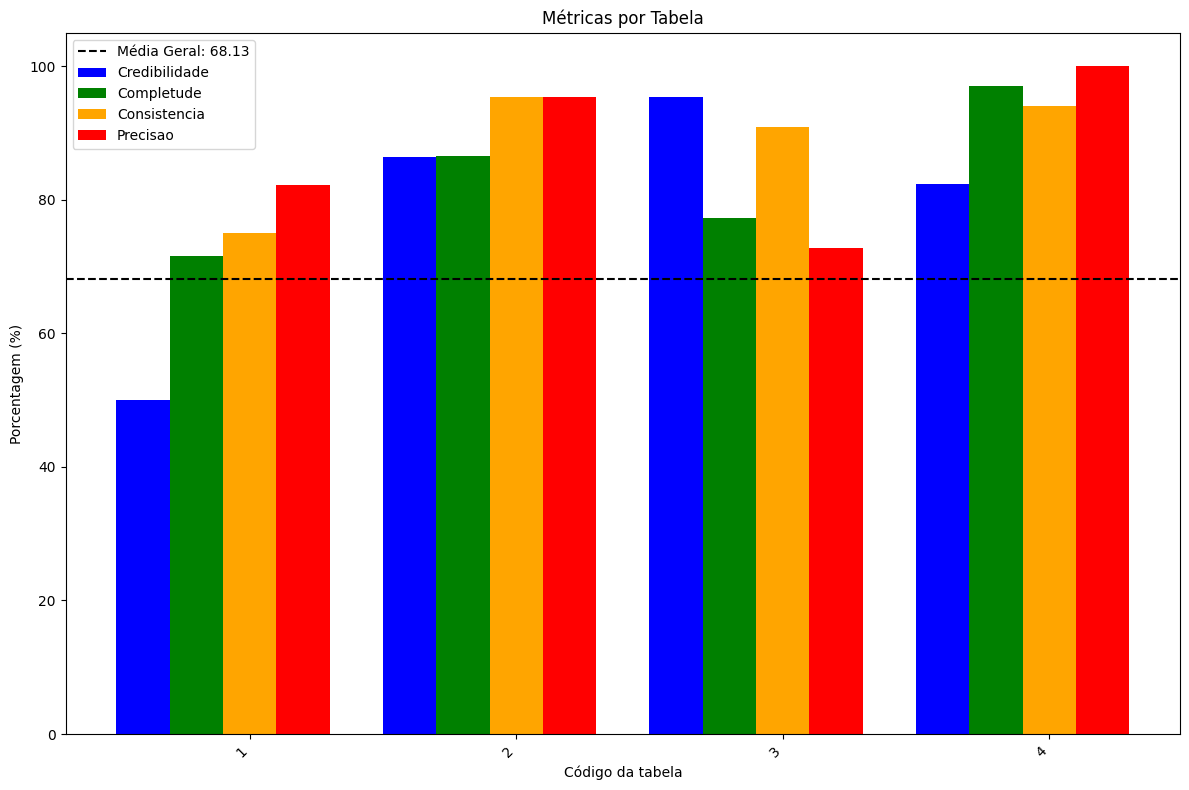

In [4]:
# Carregar os dados do CSV usando o pandas
import pandas as pd
dados_ufrn = pd.read_csv('/home/juan/Documents/Codes/meta-qd/data/analysis/metricas_ufrn.csv')
# Converter os dados de float para porcentagem
dados_ufrn['credibilidade'] *= 100
dados_ufrn['completude'] *= 100
dados_ufrn['consistencia'] *= 100
dados_ufrn['precisao'] *= 100

# Definir cores distintas para cada métrica
cores = {'credibilidade': 'blue', 'completude': 'green', 'consistencia': 'orange', 'precisao': 'red'}

# Configurar as posições das barras para cada base/metadado
posicoes = np.arange(len(dados_ufrn['nome_da_tabela']))

# Largura das barras
largura_barra = 0.2

# Criar um gráfico de barras agrupadas
plt.figure(figsize=(12, 8))

for i, metrica in enumerate(dados_ufrn.columns[2:]):
    plt.bar(posicoes + i * largura_barra, dados_ufrn[metrica], width=largura_barra, color=cores[metrica], label=metrica.capitalize())

# Adicionar uma linha horizontal para a média geral
media_geral = dados_ufrn.iloc[:, 1:].mean().mean()
media_por_coluna = dados_ufrn.drop(columns=['id_tabela'])
media_por_coluna = media_por_coluna.mean(numeric_only=True)
print(media_por_coluna)
plt.axhline(y=media_geral, color='black', linestyle='--', label=f'Média Geral: {round(media_geral, 2)}')

# Ajustar rótulos e título
plt.xlabel('Código da tabela')
plt.ylabel('Porcentagem (%)')
plt.title('Métricas por Tabela')
plt.xticks(posicoes + largura_barra * (len(dados_ufrn.columns[1:]) - 1) / 2, dados_ufrn['id_tabela'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

plt.show()

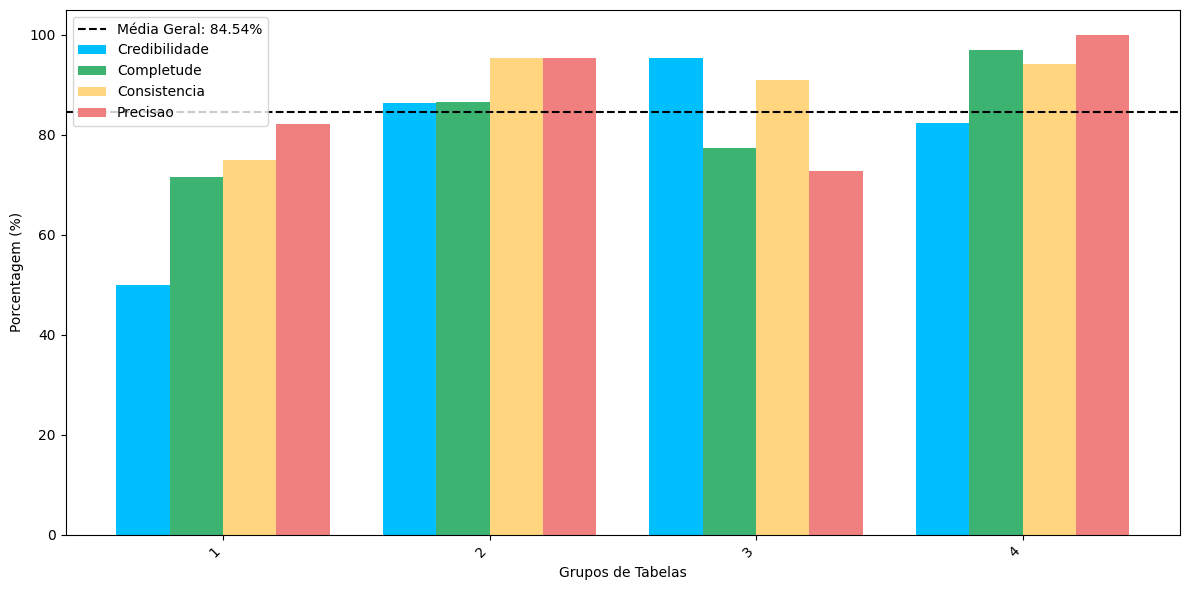

In [25]:
# Carregar os dados do CSV usando o pandas
import pandas as pd
dados_ufrn = pd.read_csv('/home/juan/Documents/Codes/meta-qd/data/analysis/metricas_ufrn.csv')
# Converter os dados de float para porcentagem
dados_ufrn['credibilidade'] *= 100
dados_ufrn['completude'] *= 100
dados_ufrn['consistencia'] *= 100
dados_ufrn['precisao'] *= 100

# Identificar grupos com métricas idênticas
agrupamentos = dados_ufrn.groupby(['credibilidade', 'completude', 'consistencia', 'precisao']).agg({
    'id_tabela': lambda x: ','.join(x.astype(str)),
    'nome_da_tabela': lambda x: ','.join(x)
}).reset_index()

# Ordenar os agrupamentos pela ordem numérica dos IDs das tabelas
agrupamentos['id_tabela_num'] = agrupamentos['id_tabela'].apply(lambda x: int(x.split(',')[0]))
agrupamentos = agrupamentos.sort_values(by='id_tabela_num').drop(columns=['id_tabela_num'])


# Definir cores suaves para cada métrica
cores = {
    'credibilidade': '#00BFFF',  # DeepSkyBlue
    'completude': '#3CB371',     # MediumSeaGreen
    'consistencia': '#FFD580', # Amarelo
    'precisao': '#F08080' # Light Coral
}

# Configurar as posições das barras para cada grupo/metadado
posicoes = np.arange(len(agrupamentos['id_tabela']))
largura_barra = 0.2

# Criar gráfico de barras agrupadas
plt.figure(figsize=(12, 6))

for i, metrica in enumerate(agrupamentos.columns[:4]):
    plt.bar(posicoes + i * largura_barra, agrupamentos[metrica], width=largura_barra, color=cores[metrica], label=metrica.capitalize())

# Calcular a média geral usando os dados originais (não agrupados)
media_geral = dados_ufrn[['credibilidade', 'completude', 'consistencia', 'precisao']].mean().mean()
plt.axhline(y=media_geral, color='black', linestyle='--', label=f'Média Geral: {round(media_geral, 2)}%')

# Ajustar rótulos e título
plt.xlabel('Grupos de Tabelas')
plt.ylabel('Porcentagem (%)')
plt.xticks(posicoes + largura_barra * 1.5, agrupamentos['id_tabela'], rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Exibir o gráfico
plt.show()

<Figure size 800x800 with 0 Axes>

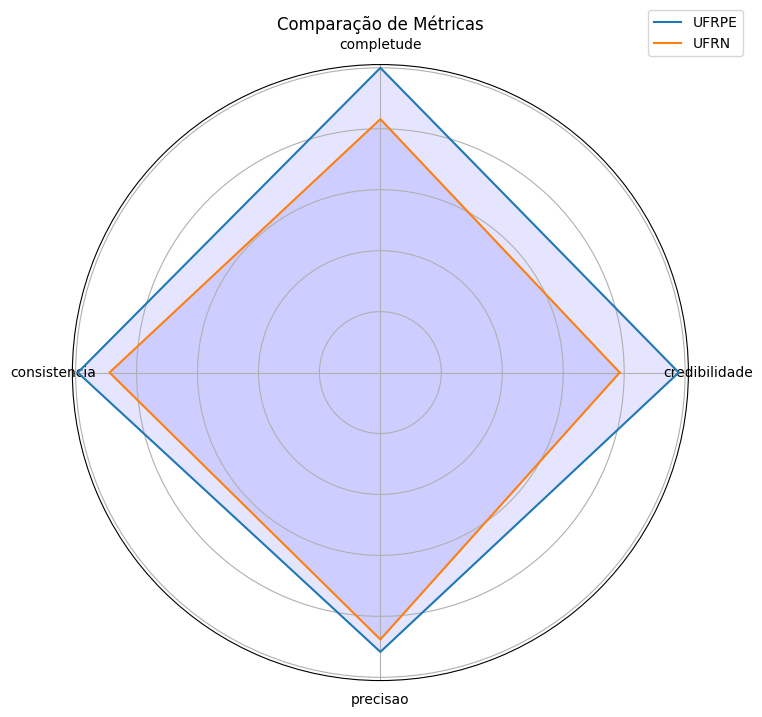

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def plotar_radar(valores, categorias, legendas, titulo='Comparação de Métricas'):
    num_categorias = len(categorias)
    angulos = np.linspace(0, 2 * np.pi, num_categorias, endpoint=False).tolist()
    angulos += angulos[:1]

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for i, conjunto in enumerate(valores):
        # Replicar o primeiro valor para fechar o gráfico
        conjunto += conjunto[:1]
        ax.plot(angulos, conjunto, label=legendas[i])
        ax.fill(angulos, conjunto, 'b', alpha=0.1)

    ax.set_yticklabels([])
    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(categorias)
    ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
    plt.title(titulo)

categorias = ['credibilidade', 'completude', 'consistencia', 'precisao']

valores_ufrpe = [97.91, 99.99, 99.30, 91.66] 
valores_ufrn = [78.54, 83.15, 88.87, 87.58] 

# Na medida que meu K varia e faz com que minha consistencia diminua em contrapartida ele aumenta minha precisão
# Então talvez a media aritmetica não seja uma boa média

plt.figure(figsize=(8, 8))
plotar_radar([valores_ufrpe, valores_ufrn], categorias, ['UFRPE', 'UFRN'])
plt.show()
